<a href="https://colab.research.google.com/github/POOJA-code672/Calculator-/blob/main/Project4_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using ML

-Python

-XGBoost Regression

importing the dependances

In [ ]:
import numpy as  np # for making the array /Used for numerical and scientific computing
import pandas as pd # making the dataframe /Used for data manipulation and analysis
import matplotlib.pyplot as plt # for making the graph and plot
import seaborn as sns # for making the graph and plot
import sklearn.datasets#
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing the Boston Price Dataset


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = housing.frame
print(df.head())

# Features and Target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']


   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]


In [ ]:
# loading the dataset to a pandas dataframe
import pandas as pd
housing_dataframe = pd.DataFrame(housing.data)

# print First 5 rows
housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing_dataframe.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
# add the target (price) column to the dataframe
housing_dataframe['Price'] = housing_dataframe.HouseAge
housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,41.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,21.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,52.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,52.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,52.0


In [ ]:
# checking the number of rows and columns in the data frame
housing_dataframe.shape

(20640, 9)

In [ ]:
# checking the missing values
housing_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
# statistical measuresof the dataset
housing_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,28.639486
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,12.585558
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,18.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,29.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,37.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,52.000000


Understanding the correlation batween various features in the dataset

1.positive Correlation

2.Negative Correlation

In [ ]:
correlation = housing_dataframe.corr()

<Axes: >

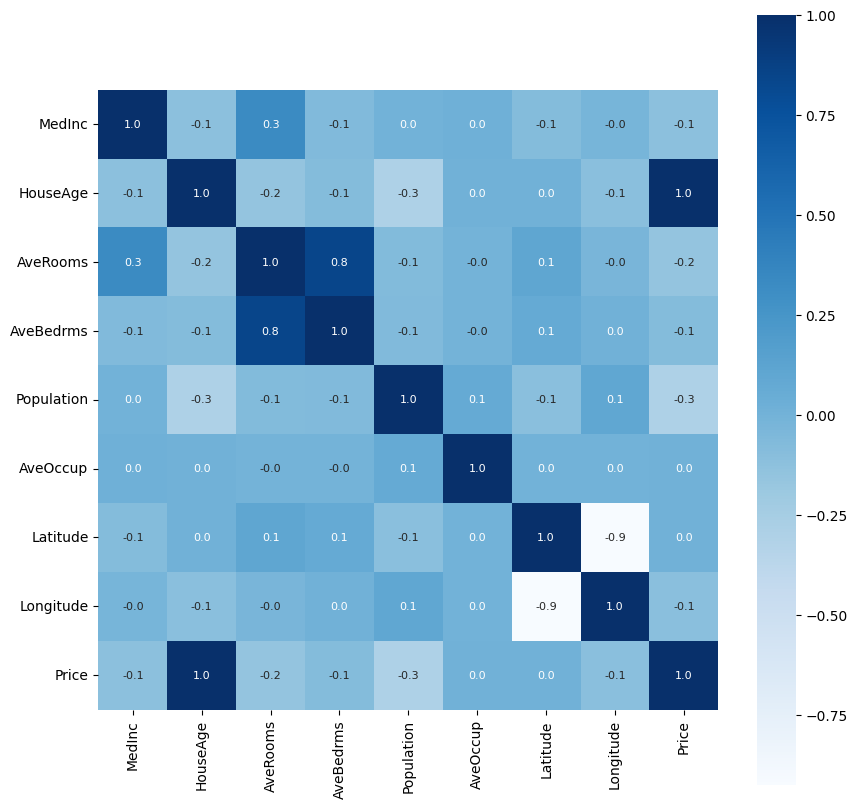

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

Splitting the data and Target

In [ ]:
x = housing_dataframe.drop(['Price'],axis=1)
y = housing_dataframe['Price']
print(x)
print(y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638   

Splitting the data into training data and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
# training the model with x_train
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Visualizing the actual prices and predicted prices

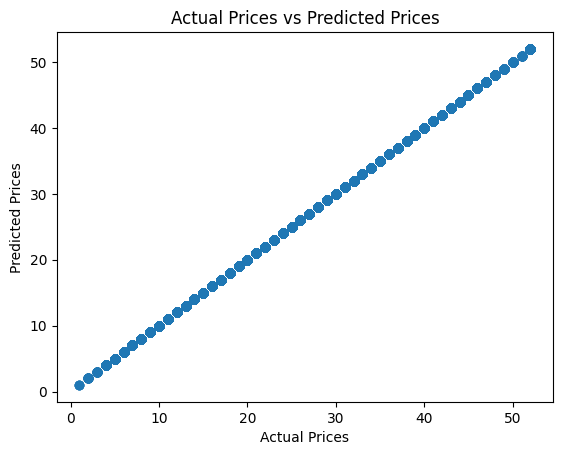

In [ ]:
plt.scatter(y_train,model.predict(x_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(x_train)
print(training_data_prediction)

[ 6.000013  8.000009 25.000004 ... 19.000002 38.999996 30.999996]


In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999999999983626
Mean Absolute Error :  7.460991195005964e-06


Prediction on test data

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[15.000009 12.000007 34.999996 ... 30.       32.000004 28.000008]
